# Experiment 1 - Hello World

### Description
* **Dataset** : CloPeMa CTU 'Flat and Wrinkled' and 'Folded' combined. Validation subset randomly chosen with a probabilty of 30%.
(https://drive.google.com/open?id=0B8Z1YBnBij8sYmpZanJ2a2VaSGs)
* **

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

Using TensorFlow backend.


In [2]:
DATASET_PATH = '/home/danfergo/SIG/Code/Experiments/data/clopema'
HISTORY_PATH = '/home/danfergo/SIG/Code/Experiments/history/experiment_1.1'

In [3]:
train_datagen = ImageDataGenerator(
)

validation_datagen = ImageDataGenerator(
)

train_generator = train_datagen.flow_from_directory(
        DATASET_PATH + '/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 2366 images belonging to 9 classes.
Found 262 images belonging to 9 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

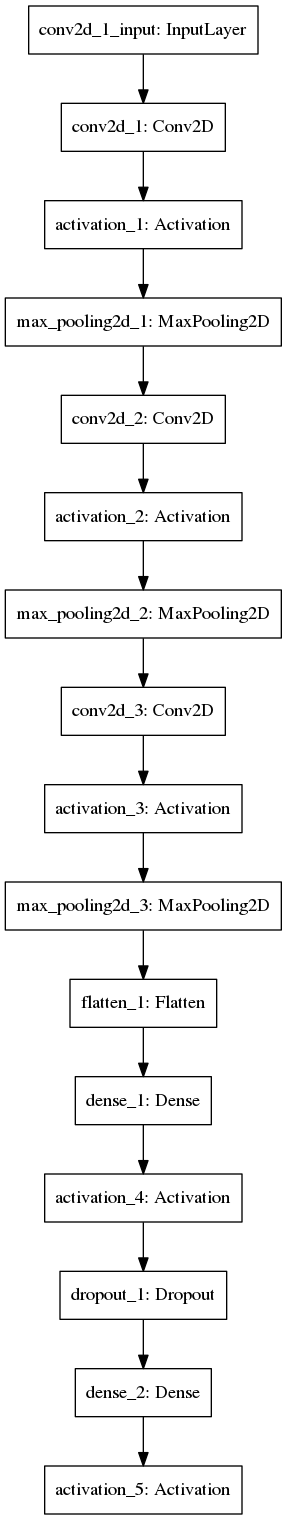

In [5]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png')
Image(filename='model.png') 

### Training

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [7]:
# (attempts) to load weights from file
try:
    model.load_weights(HISTORY_PATH + '_weights.pkl')
except: 
    pass
    
# train per se
history = model.fit_generator(
        train_generator,
        steps_per_epoch=73,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=8,
        verbose=2)

# save weights
model.save_weights(HISTORY_PATH + '_weights.pkl')

# (re)save and load history
import pickle

past_history = {}

try: 
    pkl_file = open(HISTORY_PATH + '_history.pkl', 'rb')
    past_history = pickle.load(pkl_file)
    pkl_file.close()
except:
    pass

full_history = {}
    
for k in history.history:
    if k in past_history:
        full_history[k] = np.concatenate((past_history[k], history.history[k]), axis=0)
    else:
        full_history[k] = history.history[k]

pkl_file = open(HISTORY_PATH + '_history.pkl', 'wb')
pickle.dump(full_history, pkl_file)
pkl_file.close()

Epoch 1/30
4s - loss: 5.0681 - acc: 0.1759 - val_loss: 4.2541 - val_acc: 0.0156
Epoch 2/30
3s - loss: 3.8139 - acc: 0.1295 - val_loss: 2.5527 - val_acc: 0.0174
Epoch 3/30
3s - loss: 3.7606 - acc: 0.0917 - val_loss: 3.5839 - val_acc: 0.0174
Epoch 4/30
3s - loss: 3.9821 - acc: 0.0934 - val_loss: 3.4985 - val_acc: 0.0174
Epoch 5/30
3s - loss: 3.8220 - acc: 0.1220 - val_loss: 2.4659 - val_acc: 0.4391
Epoch 6/30
3s - loss: 1.9792 - acc: 0.3731 - val_loss: 1.2212 - val_acc: 0.5304
Epoch 7/30
3s - loss: 1.3372 - acc: 0.5013 - val_loss: 0.8553 - val_acc: 0.6609
Epoch 8/30
3s - loss: 1.0720 - acc: 0.6283 - val_loss: 0.5799 - val_acc: 0.7870
Epoch 9/30
3s - loss: 0.8055 - acc: 0.7471 - val_loss: 0.3779 - val_acc: 0.9087
Epoch 10/30
3s - loss: 0.6299 - acc: 0.8128 - val_loss: 0.2437 - val_acc: 0.9391
Epoch 11/30
3s - loss: 0.4988 - acc: 0.8467 - val_loss: 0.1889 - val_acc: 0.9609
Epoch 12/30
3s - loss: 0.4102 - acc: 0.8783 - val_loss: 0.1345 - val_acc: 0.9609
Epoch 13/30
3s - loss: 0.3217 - acc: 

In [ ]:
# summarize history for accuracy
plt.plot(full_history['acc'])
plt.plot(full_history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(full_history['loss'])
plt.plot(full_history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Evaluation

In [ ]:
test_datagen = ImageDataGenerator(
    # rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical'
)

In [ ]:
x_test, y_test = test_generator.next()

y_pred = model.predict_classes(x_test, batch_size=256)

In [ ]:
class_indices = validation_generator.class_indices
sorted_class_indices = sorted(class_indices.items(), key=operator.itemgetter(1))
target_names = [x[0] for x in sorted_class_indices]

labels = range(0, len(target_names))
conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels)
pd.DataFrame(data = conf, index=target_names, columns=target_names)

### Results

This experiment allowed to test the working pipeline – Keras over Tensorflow with CUDA support; the auxiliar libraries – NumPy, Sklearn and Matplotlib; the development tool – Jupyter Notebook.


Because the used dataset was collected under artificial conditions, namely constant ilumination and background, the obtained results are extremely positive.

Next experiments should encompass more complex datasets such as DeepFashion.


